# Brain Age Prediction MLP

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 


# Regressor

In [2]:
from base_regressor import BaseRegressor
from Plotter import Plotter

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.preprocessing import StandardScaler


# Definir el wrapper para MLPRegressor
class MLPWrapper(BaseEstimator, RegressorMixin):
    def __init__(self,
                 layer1=None,
                 layer2=None,
                 num_hl=None,
                 batch_size=None,
                 activation=None,
                 solver=None,
                 learning_rate=None,
                 learning_rate_init=None,
                 alpha=None):
        self.layer1 = layer1
        self.layer2 = layer2
        self.num_hl = num_hl
        self.batch_size = batch_size
        self.activation = activation
        self.solver = solver
        self.learning_rate = learning_rate
        self.learning_rate_init = learning_rate_init
        self.alpha = alpha

    def fit(self, x_train, y_train):
        model_mlp = MLPRegressor(
            hidden_layer_sizes=[self.layer1, self.layer2][-1*self.num_hl:],
            max_iter=300,
            activation=self.activation,
            batch_size=self.batch_size,
            solver=self.solver,
            learning_rate=self.learning_rate,
            learning_rate_init=self.learning_rate_init,
            alpha=self.alpha
        )
        model_mlp.fit(x_train, y_train)
        self.model = model_mlp
        return self

    def predict(self, x_train):
        return self.model.predict(x_train)

    def score(self, x_train, y_train):
        return self.model.score(x_train, y_train)
    


class MLPRegressorCustom(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="MLP"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = MLPWrapper
        if params is None:
            self.params = {
                'layer1': 100,
                'layer2': 50,
                'num_hl': 1,
                'batch_size': 32,
                'activation': 'tanh',
                'solver': 'adam',
                'alpha': 0.0001,
                'learning_rate': 'adaptive',
                'learning_rate_init': 0.001,
                'max_iter': 200
            }
        if params_space is None:
            self.params_space = {
                'layer1': Integer(1000, 2000),
                'layer2': Integer(300, 1000),
                'num_hl': Integer(1, 2),
                'batch_size': Categorical([8, 32, 128, 256, 512]),
                'activation': Categorical(['relu', 'tanh', 'logistic']),
                'solver': Categorical(['adam', 'lbfgs', 'sgd']),
                'alpha': Real(1e-5, 1e-2, prior='log-uniform'),
                'learning_rate': Categorical(['constant', 'adaptive', 'invscaling']),
                'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform')
            }

        self.scaler=StandardScaler()


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = MLPRegressorCustom()
Plotters = Plotter()

# Parametros de Plot
colorset = 'blue'
nameset = 'MLP'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [9]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

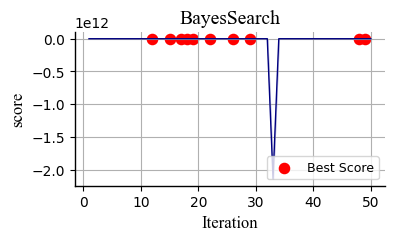

Top 1: Iteration 26, Score -12.621715333314304
Top 2: Iteration 18, Score -12.622072729666408
Top 3: Iteration 29, Score -12.695124505936091
Top 4: Iteration 15, Score -12.722168564463093
Top 5: Iteration 17, Score -12.750763005019513
Top 6: Iteration 22, Score -12.806255413463102
Top 7: Iteration 19, Score -12.808617050981084
Top 8: Iteration 12, Score -12.929290049800693
Top 9: Iteration 48, Score -13.271879789762057
Top 10: Iteration 49, Score -13.29970374677581


In [10]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [11]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'activation': 'logistic',
  'alpha': 1e-05,
  'batch_size': 8,
  'layer1': 2000,
  'layer2': 300,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver': 'adam'},
 {'activation': 'logistic',
  'alpha': 0.01,
  'batch_size': 8,
  'layer1': 1299,
  'layer2': 431,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver': 'adam'},
 {'activation': 'logistic',
  'alpha': 1e-05,
  'batch_size': 8,
  'layer1': 1534,
  'layer2': 300,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver': 'adam'},
 {'activation': 'logistic',
  'alpha': 0.0003943668902789238,
  'batch_size': 8,
  'layer1': 1881,
  'layer2': 300,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver': 'adam'},
 {'activation': 'logistic',
  'alpha': 1e-05,
  'batch_size': 8,
  'layer1': 2000,
  'layer2': 300,
  'learning_rate': 'invscaling',
  'learning_rate_init': 0.0001,
  'num_hl': 2,
  'solver

In [12]:
best_params=opt_model.best_params_

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

In [16]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [ ]:
# with open('results_model/results_training.pkl', 'wb') as f:
#     pickle.dump(results_training, f)

In [18]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     788.2
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          2.15e-136
Time:                        00:33:19   Log-Likelihood:                -5111.0
No. Observations:                1323   AIC:                         1.023e+04
Df Residuals:                    1321   BIC:                         1.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1103      0.800     33.872      0.0

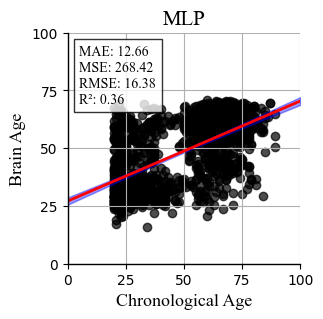

Error medio absoluto: 12.659653661776995
Error cuadrático medio: 268.42161569233923
Raíz del error cuadrático medio: 16.38357762188525
Coeficiente de determinación (R²): 0.36420324276393246


In [19]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_set
)

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [7]:
shap_summary_sorted_CN

[('Low_subj_spec_EPP_CING_left', 3710.24596431494),
 ('Low_subj_spec_RPD_CING_right', 3660.828689519752),
 ('TF_MFG_right', 3371.570161777228),
 ('Low_subj_spec_EPP_HPC_right', 3363.7926854089005),
 ('IAF_OCC_right', 3320.177790048476),
 ('Low_subj_spec_RPD_OCC_left', 2871.325802897329),
 ('High_subj_spec_EPP_CING_right', 2542.532041143321),
 ('High_subj_spec_RPD_CING_right', 2537.2101573088053),
 ('IAF_INS_right', 2528.2912467326487),
 ('Alpha2_canon_RPD_OCC_left', 2256.766268270704),
 ('Alpha2_canon_EPP_OCC_left', 2255.655191882099),
 ('IAF_OCC_left', 2233.5262485676026),
 ('IAF_IFG_right', 2077.084254973092),
 ('Low_subj_spec_RPD_CING_left', 1984.4871793634156),
 ('IAF_ORB_left', 1881.707317420828),
 ('High_subj_spec_EPP_OCC_right', 1715.0131350899742),
 ('High_subj_spec_RPD_OCC_right', 1712.6255622653273),
 ('Low_subj_spec_EPP_PARIET_left', 1693.8584430246026),
 ('IAF_MFG_left', 1575.2287482149738),
 ('IAF_ORB_right', 1492.4494623464345),
 ('Low_subj_spec_RPD_HPC_left', 1472.372152

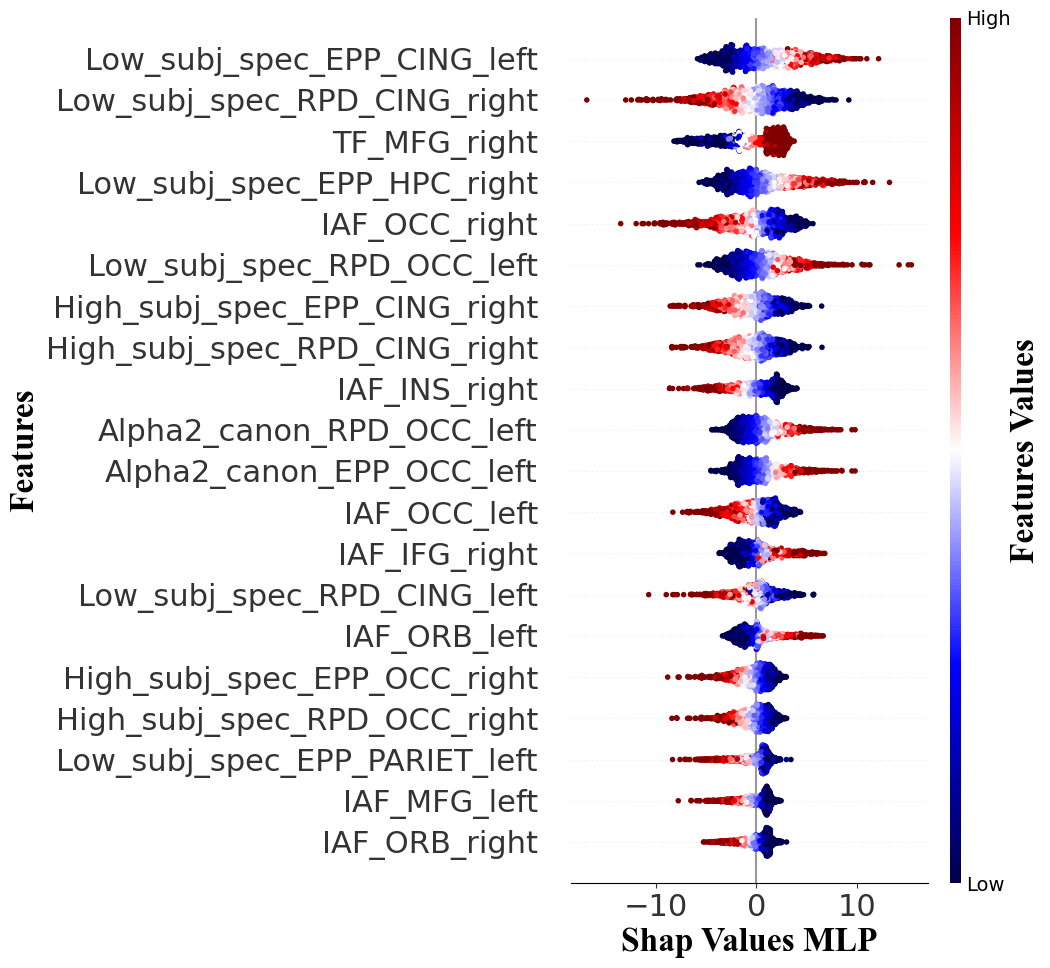

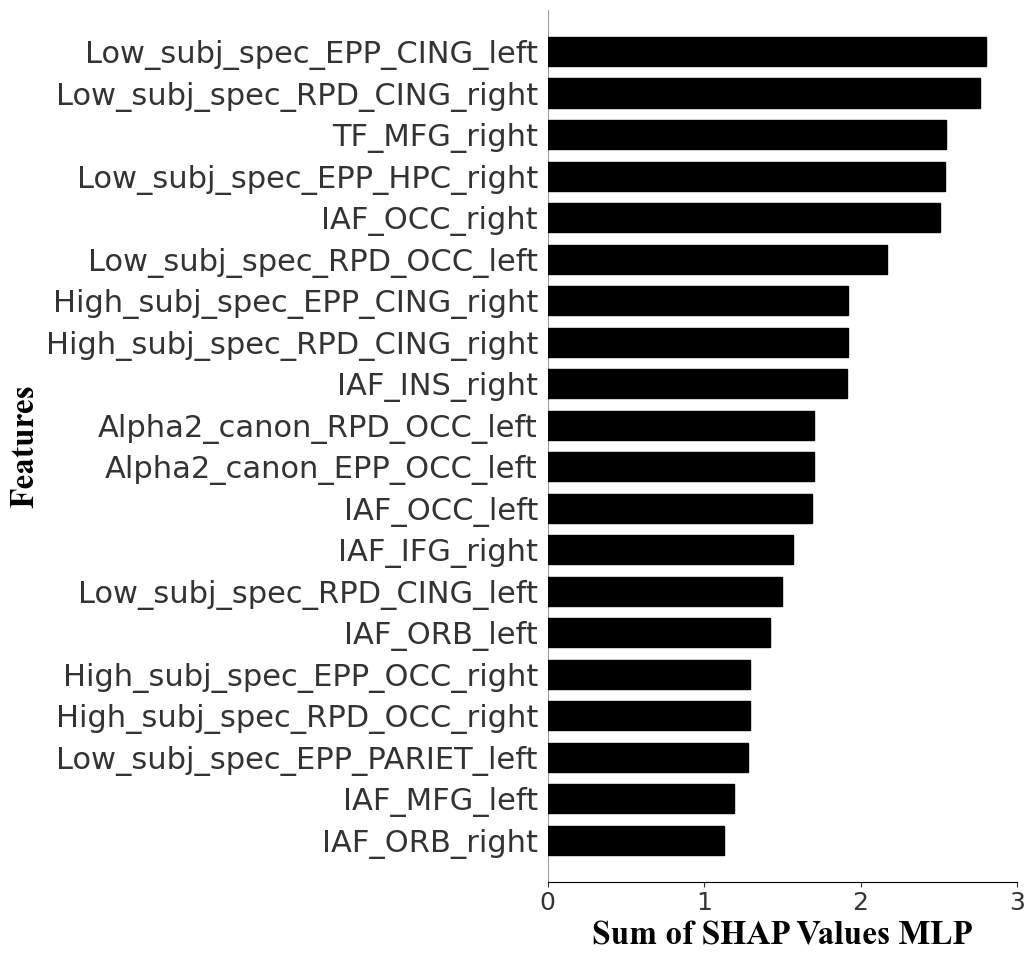

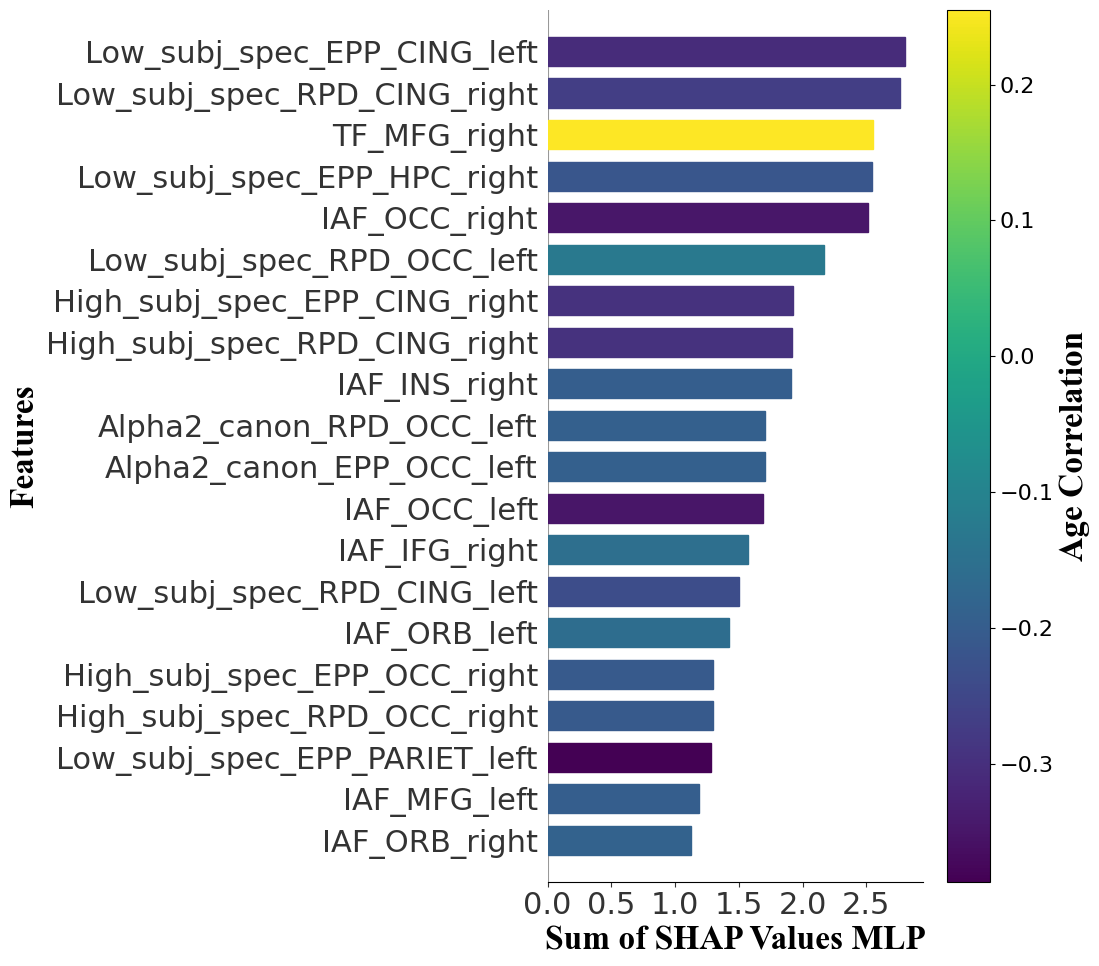

In [22]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [8]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

CING_right: 1.000000
OCC_left: 0.586700
CING_left: 0.424486
MFG_right: 0.385738
HPC_right: 0.384848
OCC_right: 0.379858
INS_right: 0.289259


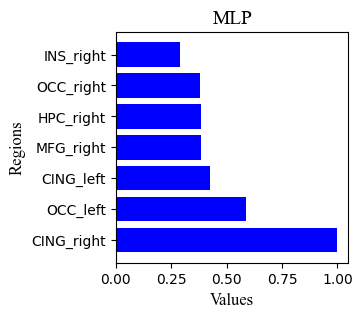

In [9]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


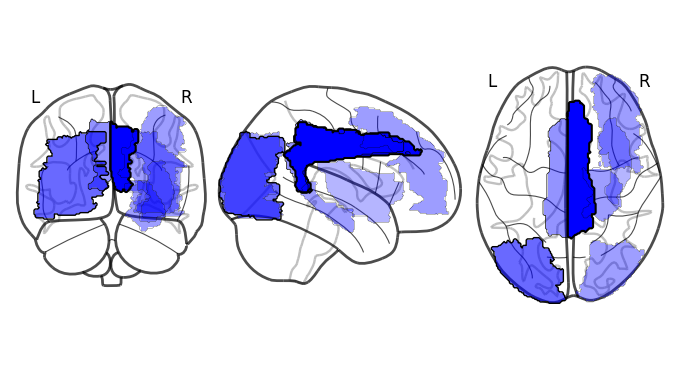

In [10]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)